In [1]:
import sys
sys.path.insert(0, '/mnt/nas/users/mjm/LDPUts')

from discretizer import discretizer
from client import client
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
from server import server_ell2, server_multinomial_genrr, server_multinomial_bitflip
from data_generator import data_generator
from discretizer import discretizer
import time
import numpy as np
from scipy.stats import chi2
from utils import chi_sq_dist

In [12]:
n_test = 1000
n_permutation = 299
significance_level = 0.05
alphabet_size = 500

###################
sample_size = 500
###################

data_gen = data_generator(device)

bump_size = 0.0015
p = torch.tensor([1/alphabet_size]).repeat(alphabet_size)


p = p.add(
    torch.remainder(
    torch.tensor(range(alphabet_size)),
    2
    ).add(-1/2).mul(2).mul(bump_size)
)


print(p)

p_value_array_priv_01 = np.zeros([n_test, 3])
p_value_array_priv_05 = np.zeros([n_test, 3])
p_value_array_priv_10 = np.zeros([n_test, 3])
p_value_array_priv_20 = np.zeros([n_test, 3])


tensor([0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005,
        0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035,
        0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005,
        0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035,
        0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005,
        0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035,
        0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005,
        0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035,
        0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005,
        0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035,
        0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005,
        0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035, 0.0005, 0.0035,
        0.0005, 0.0035, 0.0005, 0.0035, 

## privacy level = 0.1

In [13]:
privacy_level = 0.1

LDPclient = client(device, privacy_level)
server_elltwo = server_ell2(device, privacy_level)
server_genrr = server_multinomial_genrr(device, privacy_level)
server_bitflip = server_multinomial_bitflip(device, privacy_level)

t = time.time()
for i in range(n_test):
    print(f"{i+1}th test")
    torch.manual_seed(i)
    data_y = data_gen.generate_multinomial_data(p, sample_size)
    data_z = data_gen.generate_multinomial_data(p, sample_size)
    
    LDPclient.load_data_multinomial(data_y, data_z, alphabet_size)
    data_list_lapu_y, data_list_lapu_z = LDPclient.release_lapu()
    data_list_genrr_y, data_list_genrr_z = LDPclient.release_genrr()
    data_list_bitflip_y, data_list_bitflip_z = LDPclient.release_bitflip()
    
    server_elltwo.load_private_data_multinomial(data_list_lapu_y, data_list_lapu_z, alphabet_size)
    p_value_array_priv_01[i,0] = server_elltwo.release_p_value_permutation(n_permutation)
 
    server_genrr.load_private_data_multinomial(data_list_genrr_y, data_list_genrr_z, alphabet_size)
    p_value_array_priv_01[i,1] = server_genrr.release_p_value()
     
    server_bitflip.load_private_data_multinomial(data_list_bitflip_y, data_list_bitflip_z, alphabet_size)
    p_value_array_priv_01[i,2] = server_bitflip.release_p_value()
elapsed = time.time() - t
print(elapsed)
print(
   # f"small chi-square distance\n"+
        f"privacy level = {privacy_level}"
)


with open('/mnt/nas/users/mjm/LDPUts/simul/type_1/hi_dim/unif_perturbed/k_500_n_500_alpha_01_type_1_unifperturbed', 'wb') as f:
    np.save(f, p_value_array_priv_01)

1th test
2th test
3th test
4th test
5th test
6th test
7th test
8th test
9th test
10th test
11th test
12th test
13th test
14th test
15th test
16th test
17th test
18th test
19th test
20th test
21th test
22th test
23th test
24th test
25th test
26th test
27th test
28th test
29th test
30th test
31th test
32th test
33th test
34th test
35th test
36th test
37th test
38th test
39th test
40th test
41th test
42th test
43th test
44th test
45th test
46th test
47th test
48th test
49th test
50th test
51th test
52th test
53th test
54th test
55th test
56th test
57th test
58th test
59th test
60th test
61th test
62th test
63th test
64th test
65th test
66th test
67th test
68th test
69th test
70th test
71th test
72th test
73th test
74th test
75th test
76th test
77th test
78th test
79th test
80th test
81th test
82th test
83th test
84th test
85th test
86th test
87th test
88th test
89th test
90th test
91th test
92th test
93th test
94th test
95th test
96th test
97th test
98th test
99th test
100th test
101th te

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/nas/users/mjm/LDPUts/simul/type_1/hi_dim/unif_perturbed/k_500_n_500_alpha_01_type_1_unifperturbed'

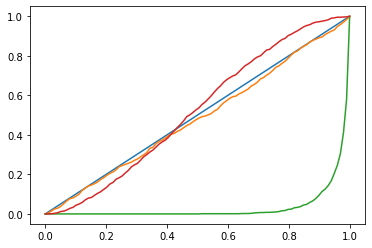

In [15]:
type_1_nominal = np.linspace(0,1,100)
type_1_real_ell2_01 = np.zeros(100)
type_1_real_genrr_01 = np.zeros(100)
type_1_real_bitflip_01 = np.zeros(100)

for i, level in enumerate(type_1_nominal):
    type_1_real_ell2_01[i] = sum( p_value_array_priv_01[:,0]<level)/n_test
    type_1_real_genrr_01[i] = sum( p_value_array_priv_01[:,1]<level)/n_test
    type_1_real_bitflip_01[i] = sum( p_value_array_priv_01[:,2]<level)/n_test
    

plt.plot(type_1_nominal, type_1_nominal)
plt.plot(type_1_nominal, type_1_real_ell2_01)
plt.plot(type_1_nominal, type_1_real_genrr_01)
plt.plot(type_1_nominal, type_1_real_bitflip_01)


## privacy level = 0.5

In [ ]:
privacy_level = 0.5

LDPclient = client(device, privacy_level)
server_elltwo = server_ell2(device, privacy_level)
server_genrr = server_multinomial_genrr(device, privacy_level)
server_bitflip = server_multinomial_bitflip(device, privacy_level)

t = time.time()
for i in range(n_test):
    print(f"{i+1}th test")
    torch.manual_seed(i)
    data_y = data_gen.generate_multinomial_data(p, sample_size)
    data_z = data_gen.generate_multinomial_data(p, sample_size)
    
    LDPclient.load_data_multinomial(data_y, data_z, alphabet_size)
    data_list_lapu_y, data_list_lapu_z = LDPclient.release_lapu()
    data_list_genrr_y, data_list_genrr_z = LDPclient.release_genrr()
    data_list_bitflip_y, data_list_bitflip_z = LDPclient.release_bitflip()
    
    server_elltwo.load_private_data_multinomial(data_list_lapu_y, data_list_lapu_z, alphabet_size)
    p_value_array_priv_05[i,0] = server_elltwo.release_p_value_permutation(n_permutation)
 
    server_genrr.load_private_data_multinomial(data_list_genrr_y, data_list_genrr_z, alphabet_size)
    p_value_array_priv_05[i,1] = server_genrr.release_p_value()
     
    server_bitflip.load_private_data_multinomial(data_list_bitflip_y, data_list_bitflip_z, alphabet_size)
    p_value_array_priv_05[i,2] = server_bitflip.release_p_value()
elapsed = time.time() - t
print(elapsed)
print(
   # f"small chi-square distance\n"+
        f"privacy level = {privacy_level}"
)


with open('/mnt/nas/users/mjm/LDPUts/simul/type_1/hi_dim/unif_perturbed/k_500_n_500_alpha_05_type_1_unifperturbed', 'wb') as f:
    np.save(f, p_value_array_priv_05)

## privacy level = 1.0

In [ ]:
privacy_level = 1.0

LDPclient = client(device, privacy_level)
server_elltwo = server_ell2(device, privacy_level)
server_genrr = server_multinomial_genrr(device, privacy_level)
server_bitflip = server_multinomial_bitflip(device, privacy_level)

t = time.time()
for i in range(n_test):
    print(f"{i+1}th test")
    torch.manual_seed(i)
    data_y = data_gen.generate_multinomial_data(p, sample_size)
    data_z = data_gen.generate_multinomial_data(p, sample_size)
    
    LDPclient.load_data_multinomial(data_y, data_z, alphabet_size)
    data_list_lapu_y, data_list_lapu_z = LDPclient.release_lapu()
    data_list_genrr_y, data_list_genrr_z = LDPclient.release_genrr()
    data_list_bitflip_y, data_list_bitflip_z = LDPclient.release_bitflip()
    
    server_elltwo.load_private_data_multinomial(data_list_lapu_y, data_list_lapu_z, alphabet_size)
    p_value_array_priv_10[i,0] = server_elltwo.release_p_value_permutation(n_permutation)
 
    server_genrr.load_private_data_multinomial(data_list_genrr_y, data_list_genrr_z, alphabet_size)
    p_value_array_priv_10[i,1] = server_genrr.release_p_value()
     
    server_bitflip.load_private_data_multinomial(data_list_bitflip_y, data_list_bitflip_z, alphabet_size)
    p_value_array_priv_10[i,2] = server_bitflip.release_p_value()
elapsed = time.time() - t
print(elapsed)
print(
   # f"small chi-square distance\n"+
        f"privacy level = {privacy_level}"
)


with open('/mnt/nas/users/mjm/LDPUts/simul/type_1/hi_dim/unif_perturbed/k_500_n_500_alpha_10_type_1_unifperturbed', 'wb') as f:
    np.save(f, p_value_array_priv_10)

## privacy level = 2.0

In [ ]:
privacy_level = 2.0

LDPclient = client(device, privacy_level)
server_elltwo = server_ell2(device, privacy_level)
server_genrr = server_multinomial_genrr(device, privacy_level)
server_bitflip = server_multinomial_bitflip(device, privacy_level)

t = time.time()
for i in range(n_test):
    print(f"{i+1}th test")
    torch.manual_seed(i)
    data_y = data_gen.generate_multinomial_data(p, sample_size)
    data_z = data_gen.generate_multinomial_data(p, sample_size)
    
    LDPclient.load_data_multinomial(data_y, data_z, alphabet_size)
    data_list_lapu_y, data_list_lapu_z = LDPclient.release_lapu()
    data_list_genrr_y, data_list_genrr_z = LDPclient.release_genrr()
    data_list_bitflip_y, data_list_bitflip_z = LDPclient.release_bitflip()
    
    server_elltwo.load_private_data_multinomial(data_list_lapu_y, data_list_lapu_z, alphabet_size)
    p_value_array_priv_20[i,0] = server_elltwo.release_p_value_permutation(n_permutation)
 
    server_genrr.load_private_data_multinomial(data_list_genrr_y, data_list_genrr_z, alphabet_size)
    p_value_array_priv_20[i,1] = server_genrr.release_p_value()
     
    server_bitflip.load_private_data_multinomial(data_list_bitflip_y, data_list_bitflip_z, alphabet_size)
    p_value_array_priv_20[i,2] = server_bitflip.release_p_value()
elapsed = time.time() - t
print(elapsed)
print(
   # f"small chi-square distance\n"+
        f"privacy level = {privacy_level}"
)


with open('/mnt/nas/users/mjm/LDPUts/simul/type_1/hi_dim/unif_perturbed/k_500_n_500_alpha_20_type_1_unifperturbed', 'wb') as f:
    np.save(f, p_value_array_priv_20)